In [92]:
import os
import numpy as np
import scipy as sp
import librosa
import matplotlib.pyplot as plt
import pywt
import sounddevice as sd
import sympy
from scipy import signal
import soundfile as sf
import math

In [213]:
#Askisi 2.2
#2.2.A
#1
d=0.04 #apostasi mikrofonon
thita=np.pi/4 #gonia simatos fonis
N=7 #arithmos mikrofonon
fs=48000 #sixnotita deigmatolipsias
c=340

in00,fs00=sf.read("source.wav") #read source+mic signals 
in0,fs0=sf.read("sensor_0.wav") #in0==input of sensor_0
in1,fs1=sf.read("sensor_1.wav")
in2,fs2=sf.read("sensor_2.wav")
in3,fs3=sf.read("sensor_3.wav")
in4,fs4=sf.read("sensor_4.wav")
in5,fs5=sf.read("sensor_5.wav")
in6,fs6=sf.read("sensor_6.wav")

in_array=[] #unite all signals to one array
in_array.append(in0)
in_array.append(in1)
in_array.append(in2)
in_array.append(in3)
in_array.append(in4)
in_array.append(in5)
in_array.append(in6)
in_array.append(in00) #in_array[7]:source kai in_array[3]:signal kentrikou


w=np.linspace(0,2*np.pi*fs,len(in00)) 
dks=[]
dks_trans=[]
HT=[]
for n in range(0,7):
    result=(np.exp((-1j)*(n)*w*d*(np.cos(thita))/(c)))*(np.exp((1j)*(N-1)*w*d*(np.cos(thita))/(2*c))) #eks.17 ->
#-> apla me anapoda tous ekthetes gia na paroume suzugi
    dks.append(result)
    dks_trans.append(np.transpose(result))  #hermitian == conjugate transpose toy dks    
    HT.append(dks_trans[n]*(1/N)) #ta zitoumena vari - eksiswsi 10
#print(len(dks))

print("Τα βάρη είναι: ")
print(HT)

#compute the dfts of each mic_signal
#we work on the frequency domain(since convolution is turned to multiplication)
    
dft_in=[]
for i in range(0,7): 
    dft_in.append(np.fft.fft(in_array[i])) 

Y=[]
y_final=[complex(0,0) for i in range (0,len(np.real(dft_in[1])))] 
for i in range(0,7): #compute the output signal of each mic after filtering and add each one to the final result
    Y.append(dft_in[i]*dks[i]) 
    y_final+=np.fft.ifft(Y[i])  #prosthese to apotelesma sto teliko sima tou beamformer
    
    

#audio check based on noise + create the file sim_ds #keep the real part -> for sim_ds is necessary
y_final=y_final.real*(1/N) #to 1/N afora tin diairesi meta ton athroisti (vlepe sxima 3)
y_final=y_final
noise=y_final-in_array[7]
#sd.play(noise,fs)
sf.write("real_ds.wav",y_final,fs)

Τα βάρη είναι: 
[array([0.14285714+0.00000000e+00j, 0.14285713+6.91458345e-05j,
       0.14285708+1.38291653e-04j, ..., 0.14162324-1.87355619e-02j,
       0.14163229-1.86670111e-02j, 0.14164131-1.85984559e-02j]), array([0.14285714+0.00000000e+00j, 0.14285714+4.60972240e-05j,
       0.14285711+9.21944432e-05j, ..., 0.1423083 -1.25104146e-02j,
       0.14231233-1.24644938e-02j, 0.14231635-1.24185717e-02j]), array([0.14285714+0.00000000e+00j, 0.14285714+2.30486123e-05j,
       0.14285714+4.60972240e-05j, ..., 0.14271987-6.26122390e-03j,
       0.14272087-6.23819735e-03j, 0.14272188-6.21517064e-03j]), array([0.14285714+0.j, 0.14285714+0.j, 0.14285714+0.j, ...,
       0.14285714+0.j, 0.14285714+0.j, 0.14285714+0.j]), array([0.14285714+0.00000000e+00j, 0.14285714-2.30486123e-05j,
       0.14285714-4.60972240e-05j, ..., 0.14271987+6.26122390e-03j,
       0.14272087+6.23819735e-03j, 0.14272188+6.21517064e-03j]), array([0.14285714+0.00000000e+00j, 0.14285714-4.60972240e-05j,
       0.14285711-9

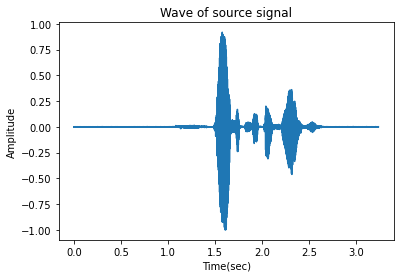

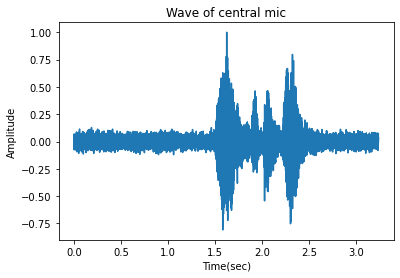

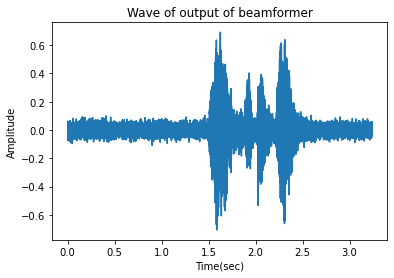

In [94]:
#Askisi 2.2.A
#2
#kimatomorfes

t=np.linspace(0,len(y_final)/fs,len(y_final))
plt.plot(t,in_array[7])
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.title('Wave of source signal')
plt.show()

plt.plot(t,in_array[3])
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.title('Wave of central mic')
plt.show()

plt.plot(t,y_final)
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude')
plt.title('Wave of output of beamformer')
plt.show()

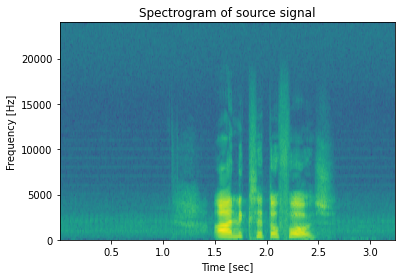

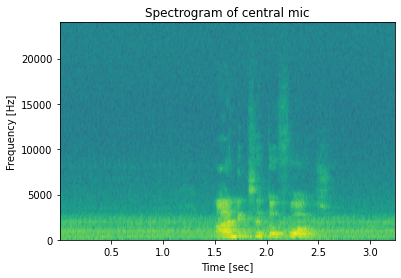

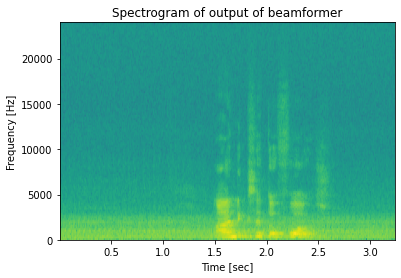

In [95]:
#2.1.A
#2
#spectrograms

plt.specgram(in_array[7],Fs=fs)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of source signal')
plt.show()

plt.specgram(in_array[3],Fs=fs)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of central mic')
plt.show()

plt.specgram(y_final,Fs=fs)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of output of beamformer')
plt.show()

In [207]:
#2.2.A
#3
#apo ton tipo tou SSNR theoroume kathe plaisio peripou 20ms
#ara me fs=48000
L=int(0.025*fs)
M=int(len(y_final)/L)
#apo ta graphimata pio pano vlepoume pos mporoume na ipologisoume ton thorivo apo
#ta prota 0.2 seconds (mias kai o thorivos den eksartatai apo ton xrono)

'''''
def interpolation(arxiko, sima):
    xloc=[]
    new_xloc=[]
    newsize=len(sima)
    interpolated=[]
    xloc=np.arange(len(arxiko))
    new_xloc=np.linspace(0,len(sima),newsize)
    interpolated=np.interp(new_xloc, xloc, arxiko)
    return interpolated
def powerlol(a):
    power1=0
    for i in range(0, len(a)):
        power1 += abs(a[i])**2
    return power1
'''''
def snr(a,b):
    temp=0
    a = np.asanyarray(a) #signal_array
    b = np.asanyarray(b) #noise_array
    power_signal=0
    power_noise=0
    for i in range(0,len(a)):
        power_signal+=abs(a[i])**2 
    for j in range(0,len(b)):
        power_noise+=abs(b[j])**2
    temp=np.log10(power_signal/power_noise)
    if temp>35:
        temp=35
    elif temp<-5:
        temp=-5
    return temp #orismos snr

thorivos1=y_final[int(0):int(L)]
power_thorivos=0
for m in range(0, len(thorivos1)):
    power_thorivos += abs(thorivos1[m])**2

yin=signal_buffer(in_array[3],plaisio,overlap)   #input signal
sourceframe=signal_buffer(in_array[7],plaisio,overlap)    #clear signal
yout=signal_buffer(y_final,plaisio,overlap) #output signal

meg=len(yin)
SSNR_A=0
for i in range(0, meg-1):
    SSNR_A += snr(yin[i],thorivos1)
InputSSNR=10*SSNR_A/meg
print("SNR of central mic(in) is: ",InputSSNR)

SSNR_B=0
for i in range(0, meg-1):
    SSNR_B += snr(yout[i],thorivos1)
OutputSSNR=10*SSNR_B/meg
print("SNR of beamformer(out) is: ",OutputSSNR)

#SSNR_central=sinartisi(in_array[3], power_thorivos,L,M)
#SSNR_output_beam=sinartisi(y_final, power_thorivos,L,M)
#print("SNR of central mic(in) is: ",SSNR_central)
#print("SNR of beamformer(out) is: ",SSNR_output_beam)

SNR of central mic(in) is:  4.713797551672598
SNR of beamformer(out) is:  3.200677968816983


In [210]:
#2.2.B
#1
from scipy.signal.signaltools import wiener
#nperseg=plaisio
def signal_buffer(data,duration,dataOverlap):
    numberOfSegments = int(math.ceil((len(data)-dataOverlap)/(duration-dataOverlap)))
    #print(numberOfSegments)
    tempBuf = [data[i:i+duration] for i in range(0,len(data),(duration-int(dataOverlap)))]
    tempBuf[numberOfSegments-1] = np.pad(tempBuf[numberOfSegments-1],(0,duration-tempBuf[numberOfSegments-1].shape[0]),'constant')
    tempBuf2 = np.vstack(tempBuf[0:numberOfSegments])
    return tempBuf2

plaisio=int(0.025*fs)
overlap=0.5*plaisio
step=int(plaisio-overlap)
inputframe=signal_buffer(y_final,plaisio,overlap); #we have 1200 frames
sourceframe=signal_buffer(in_array[7],plaisio,overlap)
window=np.hamming(plaisio)
numofframes=int(len(y_final)/plaisio)
#numofframes=40
noisyframe=thorivos1
y_wiener=[]
for i in range(0,len(inputframe)):
    xt = inputframe[i]
    st = sourceframe[i]
    #xt = xt*window
    fx,Px = sp.signal.welch(xt,fs=48000,detrend=False, return_onesided=False, nfft=plaisio)
    fv,Pv = sp.signal.welch(thorivos1,fs=48000,detrend=False, return_onesided=False,nfft=plaisio)
    xt = xt*window
    Hw = 1 - (Pv/Px) 
    xt_DFT = np.fft.fft(xt)
    wiener_output = Hw*xt_DFT
    y_wiener.append(np.fft.ifft(wiener_output))

output=[]
temp3=0
for i in range(0,len(y_wiener)):
    if i==0:
        for k in range(0,600):
            output.append(1.8*np.real(y_wiener[i][k]))
    elif (i>0) and (i<len(y_wiener)-1):
        for k in range(0,600):
            temp3=1.8*(y_wiener[i][k+600]+y_wiener[i+1][k])
            output.append(np.real(temp3))
    elif (i==len(y_wiener)-1):
        for k in range(600,1200):
            output.append(np.real(y_wiener[i][k]))
            
sf.write("real_mmse.wav",output,fs)

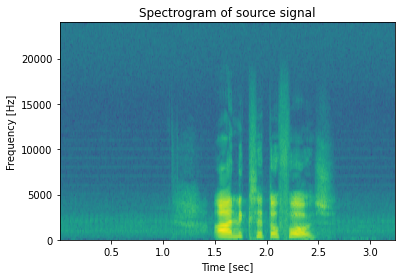

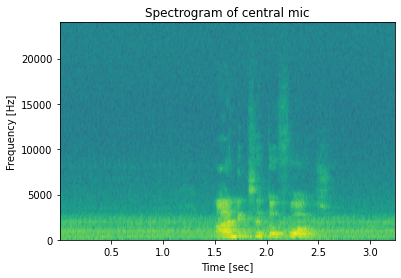

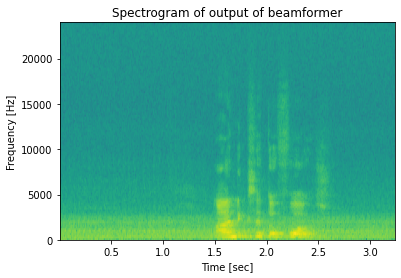

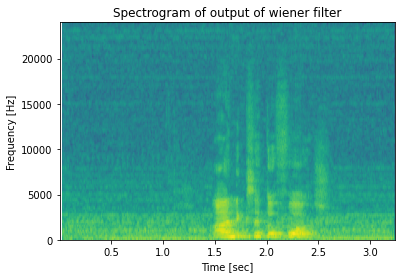

In [211]:
#2.2.B
#2
#spectrograms

plt.specgram(in_array[7],Fs=fs)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of source signal')
plt.show()

plt.specgram(in_array[3],Fs=fs)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of central mic')
plt.show()

plt.specgram(y_final,Fs=fs)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of output of beamformer')
plt.show()

plt.specgram(np.real(output),Fs=fs)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of output of wiener filter')
plt.show()

In [215]:
win=signal_buffer(y_final,plaisio,overlap)   #input signal
sourceframe=signal_buffer(in_array[7],plaisio,overlap)    #clear signal
wout=signal_buffer(np.real(output),plaisio,overlap) #output signal

def snr(a,b):
    temp=0
    a = np.asanyarray(a) #signal_array
    b = np.asanyarray(b) #noise_array
    power_signal=0
    power_noise=0
    for i in range(0,len(a)):
        power_signal+=abs(a[i])**2 
    for j in range(0,len(b)):
        power_noise+=abs(b[j])**2
    temp=np.log10(power_signal/power_noise)
    if temp>35:
        temp=35
    elif temp<-5:
        temp=-5
    return temp #orismos snr
meg=len(inputframe)
SSNR_1=0
for i in range(0, meg-1):
    SSNR_1 += snr(win[i],thorivos1)
InputSSNR=10*SSNR_1/meg
print("SSNR of wiener(in) is: ", InputSSNR)

SSNR_2=0
for i in range(0, meg-1):
    SSNR_2 += snr(wout[i],thorivos1)
OutputSSNR=10*SSNR_2/meg
print("SSNR of wiener(out) is: ",OutputSSNR)

SSNR of wiener(in) is:  3.200677968816983
SSNR of wiener(out) is:  5.679030057115995
